In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv("expenses.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

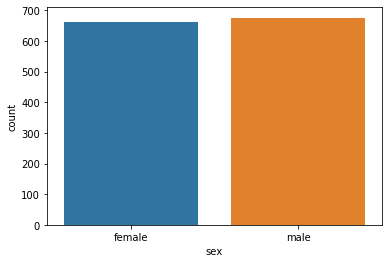

In [4]:
sb.countplot(x="sex",data=data)

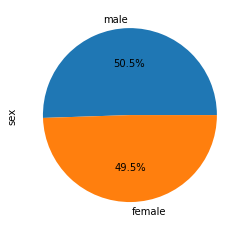

In [5]:
data["sex"].value_counts().plot.pie(autopct="%1.1f%%")

In [6]:
data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

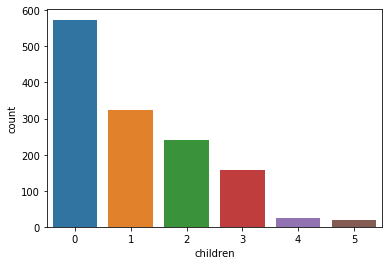

In [7]:
sb.countplot(x="children",data=data)

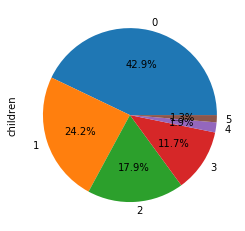

In [8]:
data["children"].value_counts().plot.pie(autopct="%1.1f%%")

In [9]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

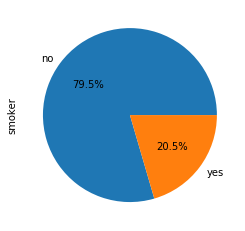

In [10]:
data["smoker"].value_counts().plot.pie(autopct="%1.1f%%")

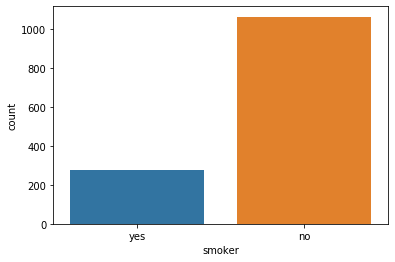

In [11]:
sb.countplot(x="smoker",data=data)

In [12]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

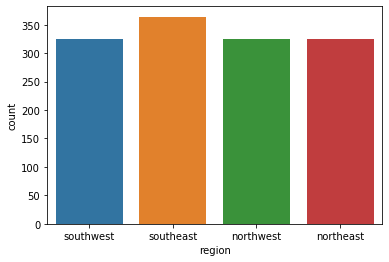

In [13]:
sb.countplot(x="region",data=data)

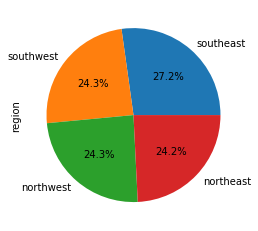

In [14]:
data["region"].value_counts().plot.pie(autopct="%1.1f%%")

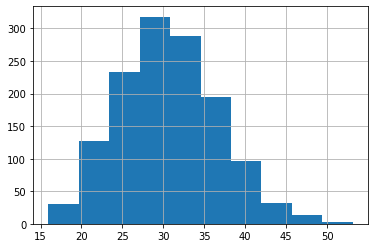

In [15]:
data.bmi.hist()

In [16]:
data.shape

(1338, 7)

In [17]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
data.isnull().sum()

age         0
sex         0
bmi         2
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
data.fillna(0,inplace=True)

In [20]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

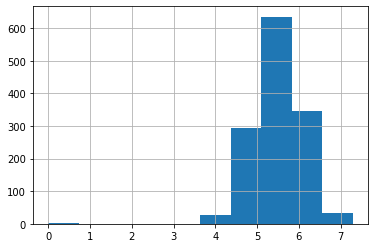

In [21]:
np.sqrt(data["bmi"]).hist()

In [22]:
data["sex"].replace({"female":0,"male":1},inplace=True)

In [23]:
data["smoker"].replace({"yes":0,"no":1},inplace=True)

In [24]:
data["region"].replace({"southwest":1,"southeast":2,"northwest":3,"northeast":4},inplace=True)

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


In [26]:
corr=data.corr()
corr.nlargest(7,["charges"])["charges"]

charges     1.000000
age         0.299591
bmi         0.198122
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: charges, dtype: float64

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


In [28]:
X=data.drop(["charges"],1)

In [29]:
Y=data["charges"]

In [30]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,2
2,28,1,33.000,3,1,2
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3


In [31]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression(normalize=True)
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [36]:
model.coef_

array([   245.80213467,   -348.18673314,    304.50791904,    360.63729941,
       -23971.56747308,    359.25058292])

In [37]:
model.intercept_

12296.116833269067

In [38]:
Y_predict=model.predict(X_test)
Y_predict

array([ 4543.52129799, 12669.01581861, 12138.31508267, 13323.39209757,
         648.62193204, 32199.48725767, 12882.53503377, 12233.87517843,
        3976.36372744, 30148.3060446 , 11260.7578604 , 16898.90963332,
        8850.20774562,  8198.85655087,  3603.50986946, 10051.52942802,
        4079.43712176,  6803.65591223, 15026.64297439, 14033.19520488,
       12319.96426972, 33361.62817594,  9156.24897801,  8725.63059001,
        3356.2460978 ,  8142.18663707,  9396.10531276, 10990.80193185,
        7534.85552247,  4540.20061761, 13710.74028575,  5635.87420168,
       34727.46825028, 27415.81518334, 33766.56206876,  9487.26010447,
       30430.37426525, 26737.42822807, 15190.60857548, 34081.57093277,
        6695.54622393, 13782.66552254, 10889.52454472, 14495.82025137,
        4211.32760607, 12868.89698398,  4723.71840696, 29195.70191191,
        7434.5779159 , 13980.08301536, 13302.10901195, 11968.07714436,
        2156.50043279,  8652.66142088, 26501.34482019, 10374.0590154 ,
      

In [39]:
Y_test

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
298     38746.35510
481      9304.70190
616     11658.11505
763      3070.80870
750     19539.24300
48      12629.89670
547     11538.42100
1143     6338.07560
767      7050.64200
194      1137.46970
424      8968.33000
3       21984.47061
785      6414.17800
443     28287.89766
921     13462.52000
315      9722.76950
725     40932.42950
88       8026.66660
310      8444.47400
471      2203.47185
726      6664.68595
60       8606.21740
1280     8283.68070
705      5375.03800
101      3645.08940
           ...     
1197     5699.83750
520     25656.57526
408      6652.52880
403     10269.46000
1084    15019.76005
1276     2741.94800
660      6435.62370
1229    11938.25595
774      7261.74100
909     17496.30600
1196    33307.55080
641     32787.45859
959     28468.91901
264     20462.99766
493     12574.04900
625      3736.46470
1225     4795.65680
927     12032.32600
53      37742.57570


In [40]:
E=pd.DataFrame({"actual":Y_test,"predict":Y_predict})
E.head()

,actual,predict
559,1646.4297,4543.521298
1087,11353.2276,12669.015819
1020,8798.5930,12138.315083
460,10381.4787,13323.392098
802,2103.0800,648.621932


In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(Y_test,Y_predict)

0.7396843809110603

In [43]:
model.score(X_train,Y_train)

0.7511459700553141